In [9]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


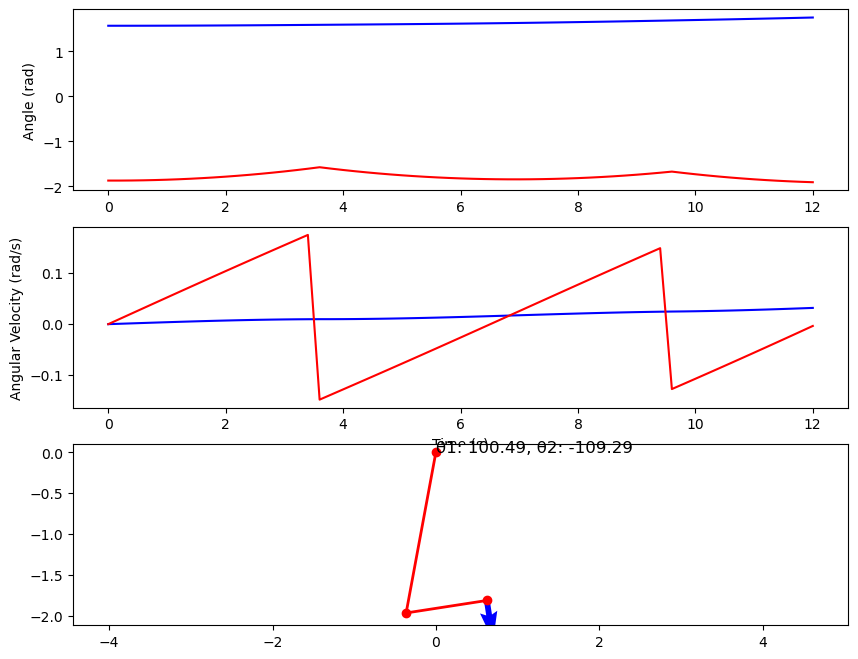

In [11]:

class Robot:
    def __init__(self, l1, l2, m1, m2, g=9.8, C=0.8):
        self.l1, self.l2 = l1, l2
        self.m1, self.m2 = m1, m2
        self.g = g
        self.C = C
        self.x_log = []

    def simulate(self, Δt, x, u):
        θ1, θ2, θ1_dot, θ2_dot = x

        M = np.array([[l1**2 * (m1 + m2), 
                     l1 * l2 * m2 * cos(θ1 - θ2)],
                    [l1 * l2 * m2 * (cos(θ1 - θ2)), 
                     l2**2 * m2]])
        
        θ_ddot = np.linalg.inv(M).dot(u * np.array([0, 1]))

        x += Δt * np.concatenate((x[2:], θ_ddot))

        if x[1] > 0:
            x[3] = -self.C * x[3]

        return x

    def run_simulation(self, x0, tf, Δt, u):
        time = np.linspace(0., tf, int(tf / Δt) + 1)
        x = x0
        self.x_log = [x.copy()]

        for t in time[1:]:
            x = self.simulate(Δt, x, u)
            self.x_log.append(x.copy())

        self.x_log = np.array(self.x_log)
        return time, self.x_log

    def visualize(self, time):
        fig, ax = plt.subplots(3, 1, figsize=(10, 8))
        camera = Camera(fig)

        ax[2].set_xlim(-2 * (self.l1 + self.l2), 2 * (self.l1 + self.l2))
        ax[2].set_ylim(-2 * (self.l1 + self.l2), 2 * (self.l1 + self.l2))

        for i in range(len(time)):
            θ1, θ2, θ1_dot, θ2_dot = self.x_log[i]
            x1, y1 = self.l1 * np.cos(θ1), -self.l1 * np.sin(θ1)
            x2, y2 = x1 + self.l2 * np.cos(θ2), y1 - self.l2 * np.sin(θ2)

            ax[0].plot(time[:i+1], self.x_log[:i+1, 0], 'b')
            ax[0].plot(time[:i+1], self.x_log[:i+1, 1] - self.x_log[:i+1, 0], 'r')
            ax[0].set_ylabel('Angle (rad)')

            ax[1].plot(time[:i+1], self.x_log[:i+1, 2], 'b')
            ax[1].plot(time[:i+1], self.x_log[:i+1, 3], 'r')
            ax[1].set_xlabel('Time (s)')
            ax[1].set_ylabel('Angular Velocity (rad/s)')

            ax[2].text(0, 0, f"θ1: {θ1*180/np.pi:.2f}, θ2: {(θ2 - θ1)*180/np.pi:.2f}", fontsize=12)
            ax[2].quiver(x2, y2, -np.sin(θ2), -np.cos(θ2), angles='xy', scale_units='xy', scale=2, color='blue')
            ax[2].plot([0, x1, x2], [0, y1, y2], 'ro-', lw=2)

            ax[2].axis('equal')
            camera.snap()

        animation = camera.animate()
        display(HTML(animation.to_jshtml()))

# Parameters
l1, l2 = 2, 1     # Lengths of the pendulum arms
m1, m2 = 1, 1     # Masses

# Time settings
tf = 12.
Δt = 0.2    # Time step

# Initial conditions
θ1, θ2, θ1_dot, θ2_dot = np.pi/2, -0.3, 0, -0.
x0 = np.array([θ1, θ2, θ1_dot, θ2_dot])

# Create a robot instance and run the simulation
robot = Robot(l1, l2, m1, m2)
time, x_log = robot.run_simulation(x0, tf, Δt, u=0.05)

# Visualize the simulation
robot.visualize(time)
